In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
# Booking_ID: Unique identifier of each booking
# no_of_adults: Number of adults
# no_of_children: Number of children
# no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
# no_of_week_nights: Number of weekday nights (Monday to Friday) the guest stayed or booked to stay at the hotel
# type_of_meal_plan: Type of meal plan booked by the customer:
# Not Selected – No meal plan selected
# Meal Plan 1 – Breakfast
# Meal Plan 2 – Half board (breakfast and one other meal)
# Meal Plan 3 – Full board (breakfast, lunch, and dinner)
# required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
# room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
# lead_time: Number of days between the date of booking and the arrival date
# arrival_year: Year of arrival date
# arrival_month: Month of arrival date
# arrival_date: Date of the month
# market_segment_type: Market segment designation.
# repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
# no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
# no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
# avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
# no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
# booking_status: Flag indicating if the booking was canceled or not.

In [2]:
!pip install tensorflow
import tensorflow as tf

ImportError: DLL load failed while importing _pywrap_tf2: A dynamic link library (DLL) initialization routine failed.

In [3]:
Hotel = pd.read_csv("INNHotelsGroup.csv")
Hotel.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [4]:
Hotel.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [5]:
Hotel.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

In [6]:
Hotel.shape

(36275, 19)

In [7]:
Hotel["booking_status"].unique() # drop Booking_ID,  lead_time. # booking_status is the target.

array(['Not_Canceled', 'Canceled'], dtype=object)

C:\Users\HP\AppData\Local\Temp\ipykernel_7744\865354704.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Hotel.corr())
C:\Users\HP\AppData\Local\Temp\ipykernel_7744\865354704.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Hotel.corr()


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
no_of_adults,1.000000,-0.019787,0.103316,0.105622,0.011429,0.097287,0.076719,0.021841,0.026338,-0.192277,-0.047426,-0.119166,0.296886,0.189401
no_of_children,-0.019787,1.000000,0.029478,0.024398,0.034244,-0.047091,0.045983,-0.003076,0.025482,-0.036348,-0.016390,-0.021189,0.337728,0.124486
no_of_weekend_nights,0.103316,0.029478,1.000000,0.179577,-0.031111,0.046595,0.055357,-0.009894,0.027304,-0.067107,-0.020690,-0.026312,-0.004525,0.060593
no_of_week_nights,0.105622,0.024398,0.179577,1.000000,-0.048784,0.149650,0.032672,0.037376,-0.009305,-0.099764,-0.030080,-0.049344,0.022753,0.045994
required_car_parking_space,0.011429,0.034244,-0.031111,-0.048784,1.000000,-0.066445,0.015684,-0.015505,-0.000037,0.110909,0.027106,0.063810,0.061304,0.087922
lead_time,0.097287,-0.047091,0.046595,0.149650,-0.066445,1.000000,0.143439,0.136814,0.006479,-0.135984,-0.045723,-0.078137,-0.062596,-0.101645
arrival_year,0.076719,0.045983,0.055357,0.032672,0.015684,0.143439,1.000000,-0.339689,0.018849,-0.018175,0.003919,0.026422,0.178605,0.053205
arrival_month,0.021841,-0.003076,-0.009894,0.037376,-0.015505,0.136814,-0.339689,1.000000,-0.042780,0.000341,-0.038615,-0.010718,0.054423,0.110552
arrival_date,0.026338,0.025482,0.027304,-0.009305,-0.000037,0.006479,0.018849,-0.042780,1.000000,-0.015949,-0.012542,-0.001498,0.017898,0.018352
repeated_guest,-0.192277,-0.036348,-0.067107,-0.099764,0.110909,-0.135984,-0.018175,0.000341,-0.015949,1.000000,0.390810,0.539156,-0.174900,-0.011820


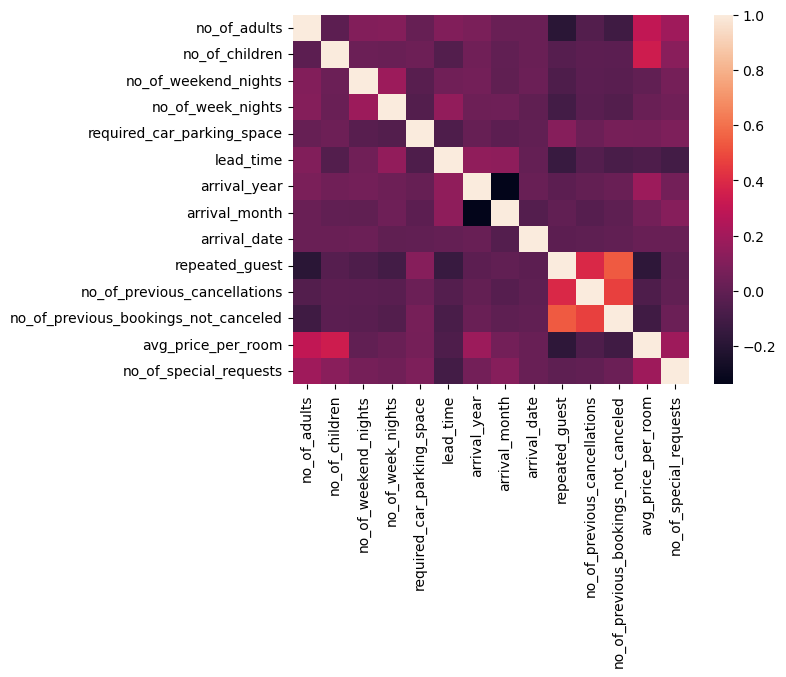

In [8]:
sns.heatmap(Hotel.corr())
Hotel.corr()

In [9]:
Hotel = Hotel.drop(["Booking_ID"], axis = 1)
Hotel.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [10]:
# Split into x and y and use supervised learning
x = Hotel.iloc[:,0:-1]
x[:3]
y = Hotel.iloc[:,-1]
y[:3]

0    Not_Canceled
1    Not_Canceled
2        Canceled
Name: booking_status, dtype: object

In [11]:
x = pd.get_dummies(x, columns = ["type_of_meal_plan", "room_type_reserved", "market_segment_type"])
x[:3]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,2017,10,2,0,...,0,0,0,0,0,0,0,0,1,0
1,2,0,2,3,0,5,2018,11,6,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,2,1,0,1,2018,2,28,0,...,0,0,0,0,0,0,0,0,0,1


In [12]:
from sklearn.preprocessing import LabelEncoder # To convert the target into binary
le = LabelEncoder()
y = le.fit_transform(y)
y

array([1, 1, 0, ..., 1, 0, 1])

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size=0.25, random_state=24)
x_test

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
3964,2,0,1,2,0,38,2018,11,4,0,...,0,1,0,0,0,0,0,0,0,1
22382,2,0,0,3,0,157,2018,6,7,0,...,0,0,0,0,0,0,0,0,0,1
17381,1,0,2,5,0,14,2018,5,30,0,...,0,1,0,0,0,0,0,0,0,1
32270,2,0,0,2,0,5,2018,6,22,0,...,0,0,0,0,0,0,0,0,0,1
23573,1,0,0,3,0,71,2018,6,14,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2945,2,0,2,5,0,195,2018,9,27,0,...,0,0,0,0,0,0,0,0,0,1
17365,1,0,0,3,0,71,2018,5,10,0,...,0,0,0,0,0,0,0,0,1,0
7035,2,0,1,1,0,7,2018,5,21,0,...,0,0,0,0,0,0,0,0,1,0
14261,1,0,0,2,0,346,2018,9,13,0,...,0,0,0,0,0,0,0,0,1,0


In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_trainsc = sc.fit_transform(x_train)
x_testsc = sc.fit_transform(x_test)
x_testsc[:3]

array([[ 0.29544131, -0.25628857,  0.208608  , -0.14557816, -0.17881672,
        -0.55558034,  0.46125635,  1.15095338, -1.30934298, -0.16451996,
        -0.06719243, -0.09064592,  0.42696286,  1.75604913,  0.55998779,
        -0.31697515,  0.        , -0.41583379, -1.88850874, -0.13443824,
         0.        ,  2.25443895, -0.09374189, -0.15620022, -0.06571862,
        -0.0546449 , -0.09131754, -0.2468804 , -0.64183879,  0.75074675],
       [ 0.29544131, -0.25628857, -0.94991369,  0.56119289, -0.17881672,
         0.82822681,  0.46125635, -0.47809993, -0.96711405, -0.16451996,
        -0.06719243, -0.09064592,  0.28348691, -0.79021509,  0.55998779,
        -0.31697515,  0.        , -0.41583379,  0.52951833, -0.13443824,
         0.        , -0.44356934, -0.09374189, -0.15620022, -0.06571862,
        -0.0546449 , -0.09131754, -0.2468804 , -0.64183879,  0.75074675],
       [-1.66029391, -0.25628857,  1.36712969,  1.97473498, -0.17881672,
        -0.8346675 ,  0.46125635, -0.8039106 ,  1

In [15]:
# USING LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2',dual=False,tol=0.0001,C=1.0,fit_intercept=True,random_state=None,solver='newton-cg',
                           max_iter=100,multi_class='auto',verbose=0,warm_start=False,)
model.fit(x_train, y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


LogisticRegression(solver='newton-cg')

In [16]:
y_predict = model.predict(x_test)
y_predict

array([1, 0, 1, ..., 1, 0, 1])

In [17]:
# To check how good the model is
from sklearn.metrics import accuracy_score, confusion_matrix

In [18]:
accuracy_score(y_test, y_predict) * 100

80.64836255375455

In [19]:
confusion_matrix(y_test, y_predict)

array([[1877, 1090],
       [ 665, 5437]], dtype=int64)

In [23]:
# USING NAIVES
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(x_train, y_train)
y_predict3 = model3.predict(x_test)
y_predict3

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
accuracy_score(y_test, y_predict3) * 100 #41% is really low. try to improve the model

41.34965266291763

In [29]:
# USING SVM
from sklearn.svm import SVC
model4 = SVC(kernel='poly', decision_function_shape='ovo')
model4.fit(x_train, y_train)
y_predict4 = model4.predict(x_test)
y_predict4

array([1, 0, 1, ..., 1, 0, 1])

In [30]:
accuracy_score(y_test, y_predict4) * 100

76.52442386150624

In [26]:
# USING DECISION TREE
from sklearn.tree import DecisionTreeClassifier
model5 = DecisionTreeClassifier(criterion='entropy',splitter ='best')
model5.fit(x_train, y_train)
y_predict5 = model5.predict(x_test)
y_predict5

array([1, 0, 1, ..., 1, 1, 1])

In [28]:
accuracy_score(y_test, y_predict5) * 100

87.37457272025581

In [31]:
#USING RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
model6 = RandomForestClassifier()
model6.fit(x_train, y_train)
y_predict6 = model6.predict(x_test)
y_predict6

array([1, 0, 1, ..., 1, 1, 1])

In [32]:
accuracy_score(y_test, y_predict6) * 100 #RANDOM FOREST IS THE BEST MODEL

90.14224280516044

In [33]:
# How to boost accuracy if accuracy of model is low. After see low accuracy then use this
from sklearn.ensemble import GradientBoostingClassifier
model7 = GradientBoostingClassifier()
model7.fit(x_train, y_train)
y_predict7 = model7.predict(x_test)
y_predict7

array([1, 0, 1, ..., 1, 1, 1])

In [34]:
accuracy_score(y_test, y_predict7) * 100

85.50005513287022